### Import Libraries

In [1]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Dataset

In [2]:
wine = load_wine()
X = wine.data  # Features (13 chemical components)
y = wine.target  # Target (3 classes of wine)

### Train, Test, Split, Evaluate

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create and train Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=3,       # Maximum depth of each tree
    random_state=42
)
rf_classifier.fit(X_train, y_train)
# Predictions
y_pred = rf_classifier.predict(X_test)
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Confusion Matrix

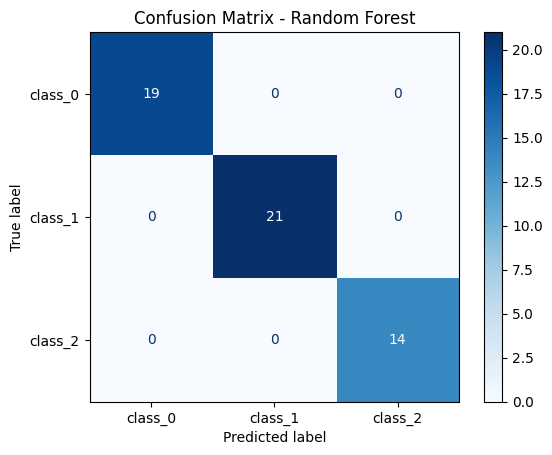

In [4]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Feature Importance

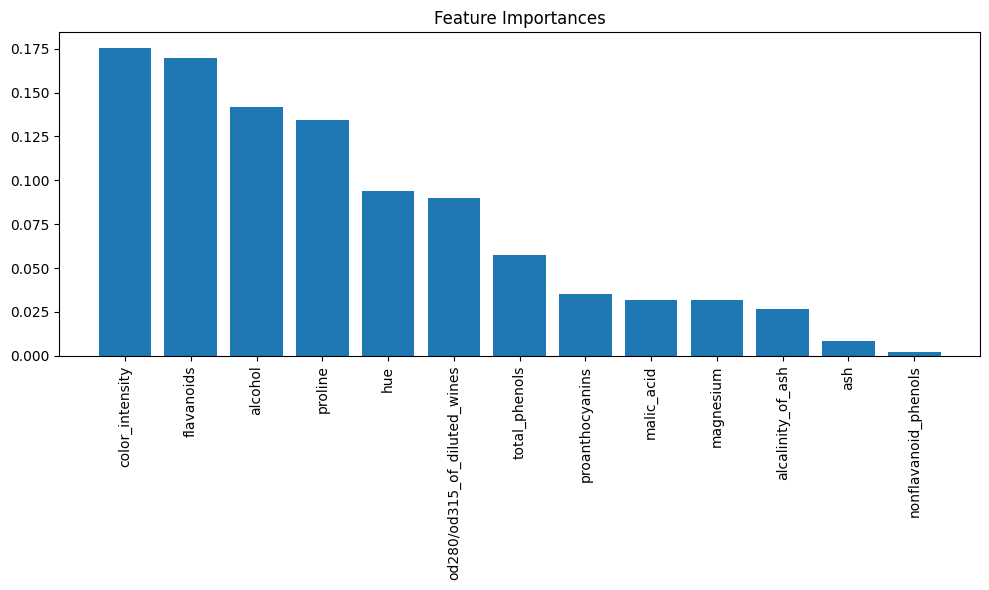

In [5]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = wine.feature_names

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

### Sample Decision Tree from the forest

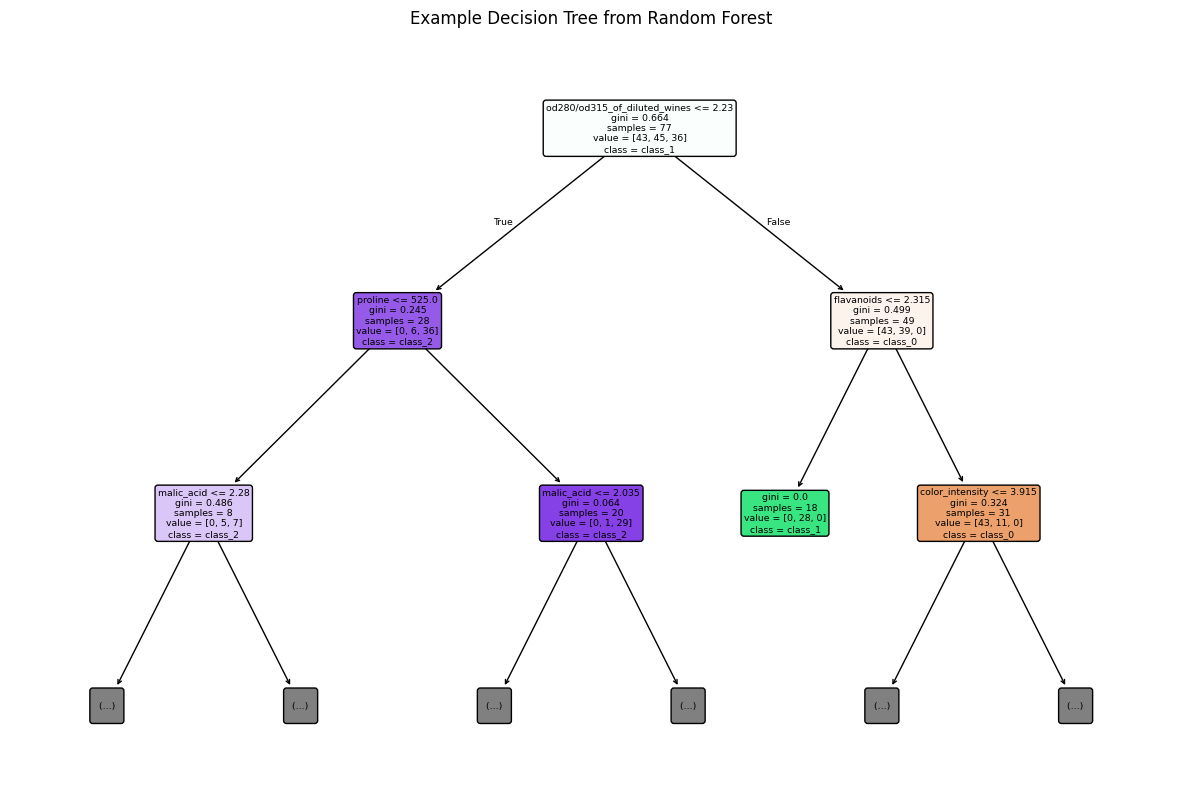

In [6]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(rf_classifier.estimators_[0], 
          feature_names=wine.feature_names, 
          class_names=wine.target_names,
          filled=True, 
          rounded=True,
          max_depth=2)  # Limit depth for visualization
plt.title("Example Decision Tree from Random Forest")
plt.show()